In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
train = pd.read_excel('./Dataset_Training.xlsx')
test = pd.read_excel('./Dataset_Test.xlsx')

In [6]:
X = train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30']]
y = train['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9134615384615384
Precision: 0.8888888888888888
Recall: 0.9655172413793104
F1: 0.9256198347107438


/Users/alfred/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Get the prediction result of test set
X_real_test = test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30']]
predictions = model.predict(X_real_test)
print(predictions)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0]


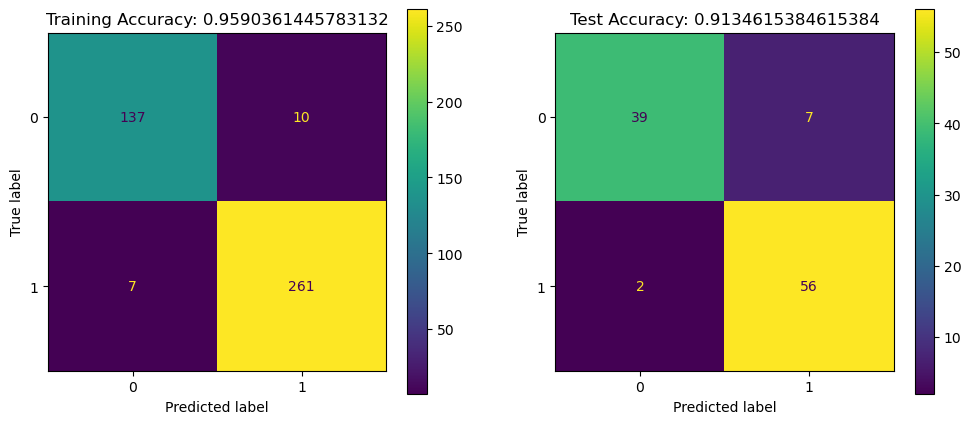

In [21]:
Acc_train = model.score(X_train, y_train)
Acc_test = model.score(X_test, y_test)

y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_hat)
cm_test = confusion_matrix(y_test, y_test_hat)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot(ax=axes[0])
axes[0].set_title(f'Training Accuracy: {Acc_train}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot(ax=axes[1])
_ = axes[1].set_title(f'Test Accuracy: {Acc_test}')